In [1]:
# Install software libraries
!pip install netCDF4
!pip install cartopy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hnaderi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hnaderi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install xarray
!pip install tqdm
!pip install beautifulsoup4
!pip install h5netcdf
!pip install rasterio
!pip install wget


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hnaderi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hnaderi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hnaderi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hnaderi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hnaderi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hnaderi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
# Import libraries
import numpy as np
import netCDF4 as nc
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import percentileofscore
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import os
from os.path import exists, join
import time
from urllib.request import urlretrieve
import tarfile

In [4]:
chrips_data = xr.open_dataset ("C:/Users/hnaderi/Downloads/chirps-v2.0.monthly.nc")
prc = chrips_data ['precip']

In [5]:
precip_corpus = prc.sel(latitude=slice(27.0, 28.5), longitude=slice(-97.7, -96.9), time=slice('1990', '2022'))
precip_austin=prc.sel(latitude=slice(30.0, 31.5), longitude=slice(-98.0, -97.2), time=slice('1990', '2022'))
precip_houston=prc.sel(latitude=slice(29.0, 30.5), longitude=slice(-95.6, -94.8), time=slice('1990', '2022'))

In [6]:
precip_corpus.to_netcdf ("precip_corpus.nc")
precip_mon_corpus_plot = xr.open_dataset ("precip_corpus.nc")
precip_mon_corpus_plot 

<xarray.Dataset>
Dimensions:    (latitude: 30, longitude: 16, time: 396)
Coordinates:
  * latitude   (latitude) float32 27.02 27.07 27.12 27.17 ... 28.38 28.42 28.47
  * longitude  (longitude) float32 -97.68 -97.63 -97.58 ... -97.03 -96.98 -96.93
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2022-12-01
Data variables:
    precip     (time, latitude, longitude) float32 ...

In [7]:
precip_austin.to_netcdf ("precip_auston.nc")
precip_austin_plot = xr.open_dataset ("precip_auston.nc")

precip_houston.to_netcdf ("precip_houston.nc")
precip_houston_plot = xr.open_dataset ("precip_houston.nc")

In [45]:
P_corpus = precip_mon_corpus_plot['precip']
P_houston = precip_houston_plot['precip']
P_austin = precip_austin_plot['precip']

In [64]:
#read CSV File Air quality PM2.5
corpus_air_quality=pd.read_csv('c:/Users/hnaderi/Downloads/Corpus_air_2019_2022_ad_viz_plotval_data.csv')
austin_air_quality=pd.read_csv('c:/Users/hnaderi/Downloads/Austin_air_2019_2022_ad_viz_plotval_data.csv')
houston_air_quality=pd.read_csv('c:/Users/hnaderi/Downloads/Houston_air_2019_2022_ad_viz_plotval_data.csv')

In [65]:
#convert Date column and resample the daily values to monthly 
corpus_air_quality['Date'] = pd.to_datetime(corpus_air_quality['Date'])
corpus_air_quality.set_index('Date', inplace=True)
# Resample to monthly frequency and compute the mean
corpus_monthly_air_quality = corpus_air_quality['Daily_Mean_PM2_5_Concentration'].resample('M').mean()

# The result is a Series. To convert it back to a DataFrame:
corpus_monthly_air_quality_df = corpus_monthly_air_quality.to_frame()

austin_air_quality['Date'] = pd.to_datetime(austin_air_quality['Date'])
austin_air_quality.set_index('Date', inplace=True)
austin_monthly_air_quality = austin_air_quality['Daily_Mean_PM2_5_Concentration'].resample('M').mean()
austin_monthly_air_quality_df = austin_monthly_air_quality.to_frame()

houston_air_quality['Date'] = pd.to_datetime(houston_air_quality['Date'])
houston_air_quality.set_index('Date', inplace=True)
houston_monthly_air_quality = houston_air_quality['Daily_Mean_PM2_5_Concentration'].resample('M').mean()
houston_monthly_air_quality_df = houston_monthly_air_quality.to_frame()

In [18]:
start_date = '2019-01-01'
end_date = '2022-12-29'

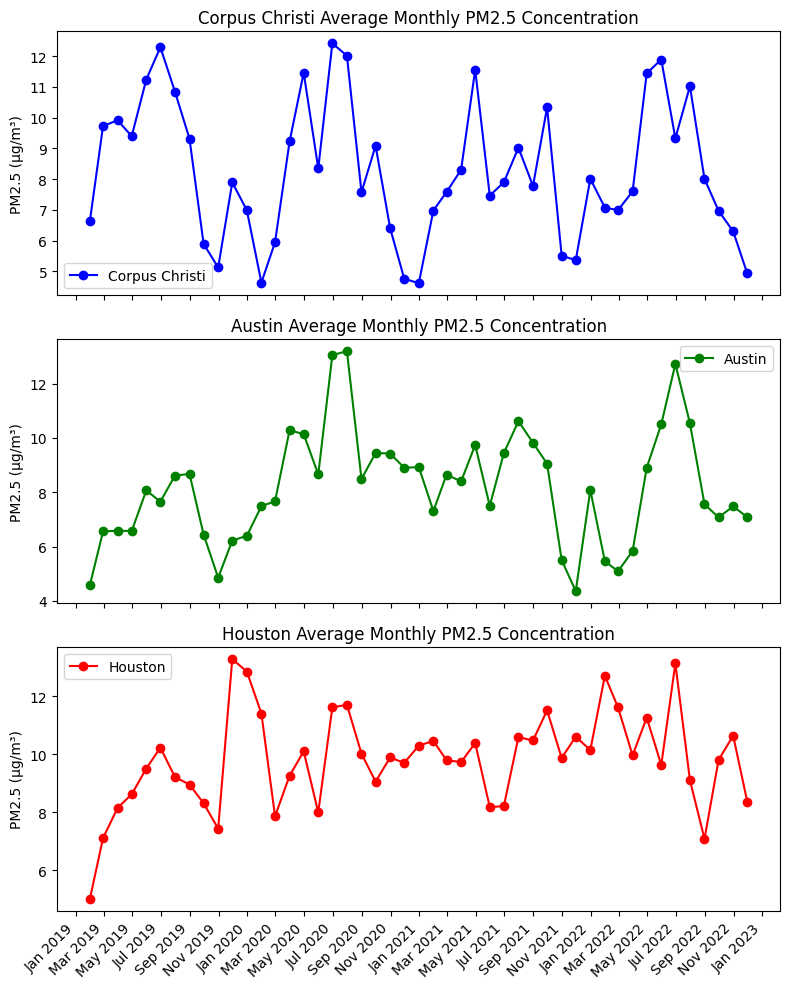

In [29]:
import matplotlib.dates as mdates
# Set the locator for major ticks to every second month and formatter to 'Month Year'
locator = mdates.MonthLocator(bymonthday=1, interval=2)  # Every two months
formatter = mdates.DateFormatter('%b %Y')  # Abbreviated month and four digit year

# Plotting as before
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharex=True)

# Corpus Christi
axes[0].plot(corpus_monthly_air_quality[start_date:end_date].index, corpus_monthly_air_quality[start_date:end_date].values, marker='o', linestyle='-', color='blue', label='Corpus Christi')
axes[0].set_title('Corpus Christi Average Monthly PM2.5 Concentration')
axes[0].set_ylabel('PM2.5 (µg/m³)')
axes[0].legend()

# Austin
axes[1].plot(austin_monthly_air_quality[start_date:end_date].index, austin_monthly_air_quality[start_date:end_date].values, marker='o', linestyle='-', color='green', label='Austin')
axes[1].set_title('Austin Average Monthly PM2.5 Concentration')
axes[1].set_ylabel('PM2.5 (µg/m³)')
axes[1].legend()

# Houston
axes[2].plot(houston_monthly_air_quality[start_date:end_date].index, houston_monthly_air_quality[start_date:end_date].values, marker='o', linestyle='-', color='red', label='Houston')
axes[2].set_title('Houston Average Monthly PM2.5 Concentration')
axes[2].set_ylabel('PM2.5 (µg/m³)')
axes[2].legend()

# Set x-axis major locator and formatter
for ax in axes:
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

# Rotate and align the tick labels
plt.setp(axes[-1].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [53]:
# Ensure the precipitation data is in the same DataFrame format as PM2.5 for easy handling
P_corpus_df = P_corpus.to_dataframe(name='precipitation').reset_index()
P_austin_df = P_austin.to_dataframe(name='precipitation').reset_index()
P_houston_df = P_houston.to_dataframe(name='precipitation').reset_index()

# Merge the PM2.5 and precipitation dataframes on their date indices for each city
corpus_merged = pd.merge(corpus_monthly_air_quality_df, P_corpus_df, left_index=True, right_on='time', how='inner')
austin_merged = pd.merge(austin_monthly_air_quality, P_austin_df, left_index=True, right_on='time', how='inner')
houston_merged = pd.merge(houston_monthly_air_quality, P_houston_df, left_index=True, right_on='time', how='inner')


In [105]:
start_date = '2019-01-01'
end_date = '2022-12-29'


dates_p_c = pd.date_range(start=start_date, periods=P_corpus[:,0,0].size, freq='D')

# Here are placeholders for creating the corresponding Pandas Series
dates_p_h = pd.date_range(start=start_date, periods=P_houston[:,0,0].size, freq='D')

dates_p_a = pd.date_range(start=start_date, periods=P_austin[:,0,0].size, freq='D')

# Create the Pandas Series for easier handling
precipitation_corpus = pd.Series(P_corpus[:, 0, 0], index=dates_p_c).resample('M').mean()

precipitation_houston = pd.Series(P_houston[:, 0, 0], index=dates_p_h).resample('M').mean()

precipitation_austin = pd.Series(P_austin[:, 0, 0], index=dates_p_a).resample('M').mean()


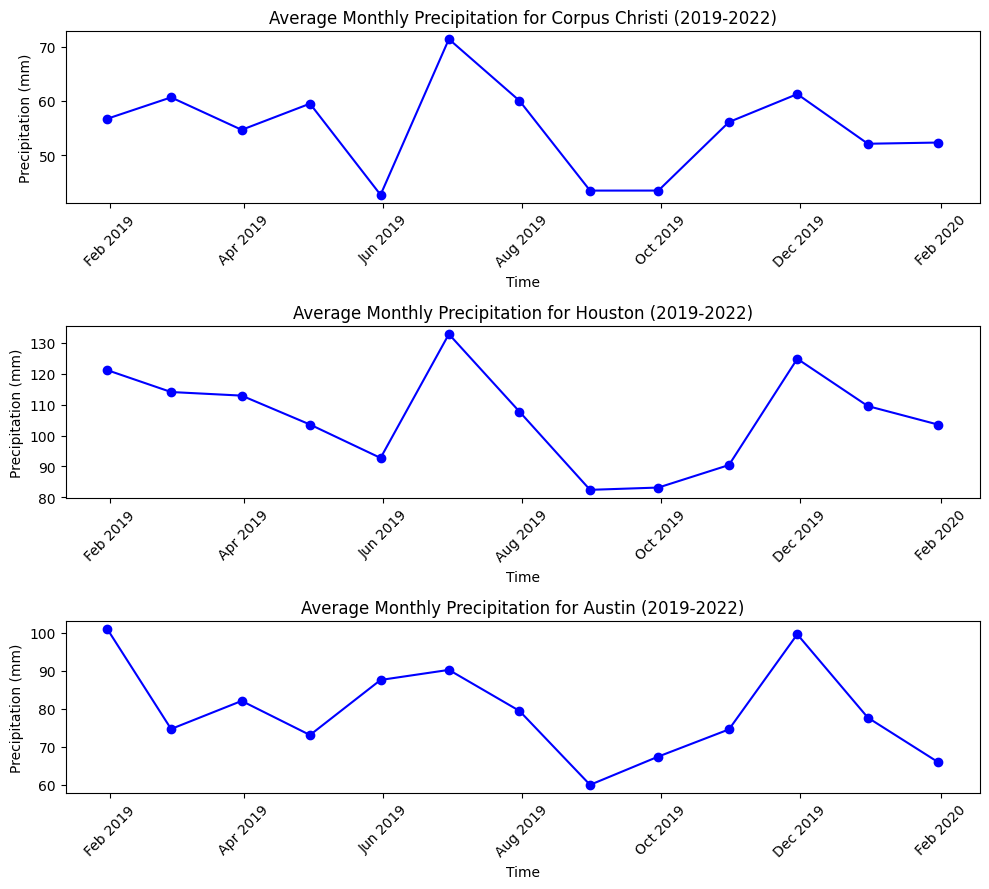

In [113]:
from matplotlib.dates import DateFormatter, MonthLocator

# Create a 3x1 grid of subplots (not 3x2 since we only have one column of plots)
fig, axs = plt.subplots(3, 1, figsize=(10, 9))

# Define a function to plot the data to avoid repeating code
def plot_city_data(ax_precip, precipitation_data, city_name):
    ax_precip.plot(precipitation_data.index, precipitation_data.values, color='blue', marker='o', linestyle='-')
    ax_precip.set_title(f'Average Monthly Precipitation for {city_name} (2019-2022)')
    ax_precip.set_xlabel('Time')
    ax_precip.set_ylabel('Precipitation (mm)')
    ax_precip.xaxis.set_major_formatter(DateFormatter('%b %Y'))
    ax_precip.xaxis.set_major_locator(MonthLocator(interval=2))

# Plot data for Corpus Christi
plot_city_data(axs[0], precipitation_corpus, 'Corpus Christi')

# Plot data for Houston
plot_city_data(axs[1], precipitation_houston, 'Houston')

# Plot data for Austin
plot_city_data(axs[2], precipitation_austin, 'Austin')

# Rotate and align the x-axis labels for readability
for ax in axs:
    ax.tick_params(axis='x', which='major', labelrotation=45)

# Adjust the layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()

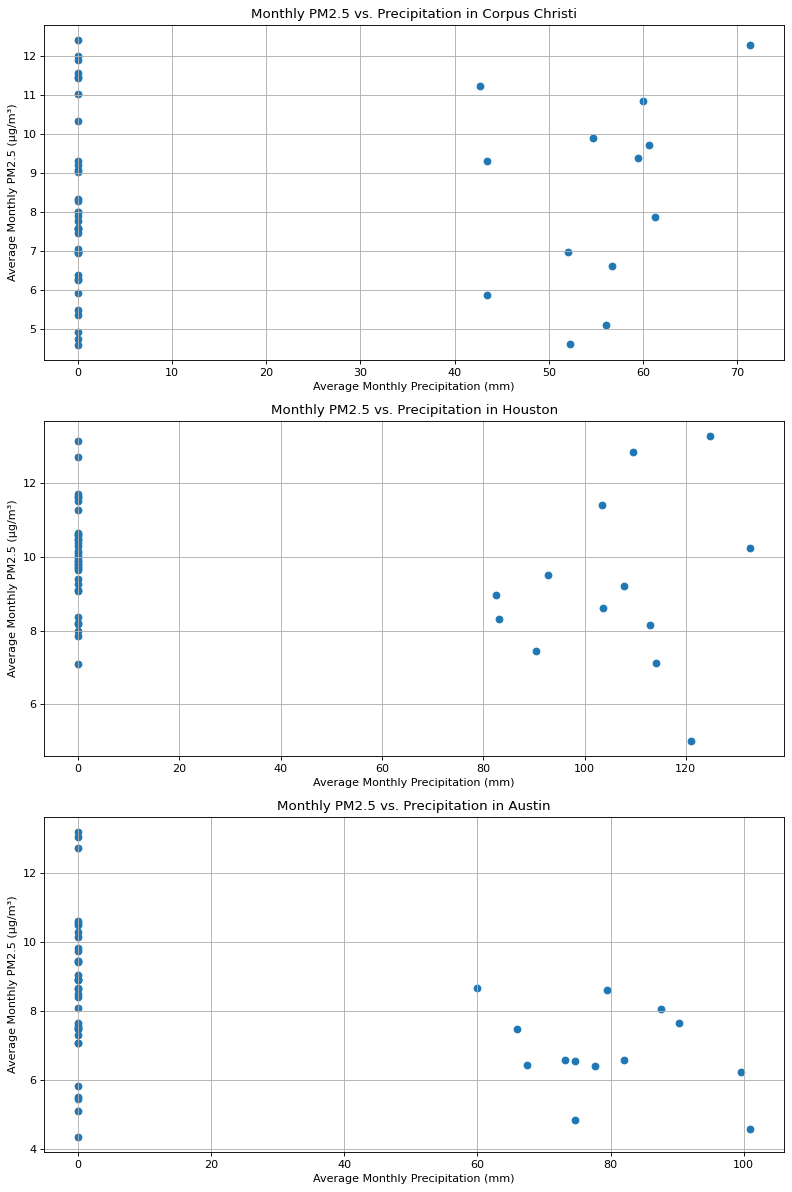

In [115]:
# Align the data by date range
precipitation_corpus_aligned = precipitation_corpus.reindex(corpus_monthly_air_quality.index, fill_value=0)
precipitation_houston_aligned = precipitation_houston.reindex(houston_monthly_air_quality.index, fill_value=0)
precipitation_austin_aligned = precipitation_austin.reindex(austin_monthly_air_quality.index, fill_value=0)

# Now plot the scatter plots
def plot_scatter(ax, air_quality_data, precipitation_data, city_name):
    # Ensure that both Series have the same index before plotting
    common_index = air_quality_data.index.intersection(precipitation_data.index)
    aligned_air_quality_data = air_quality_data[common_index]
    aligned_precipitation_data = precipitation_data[common_index]
    
    ax.scatter(aligned_precipitation_data, aligned_air_quality_data)
    ax.set_title(f'Monthly PM2.5 vs. Precipitation in {city_name}')
    ax.set_xlabel('Average Monthly Precipitation (mm)')
    ax.set_ylabel('Average Monthly PM2.5 (µg/m³)')
    ax.grid(True)

# Create a 3x1 grid of subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15), dpi=80)

# Plot scatter plot for Corpus Christi
plot_scatter(axs[0], corpus_monthly_air_quality, precipitation_corpus_aligned, 'Corpus Christi')

# Plot scatter plot for Houston
plot_scatter(axs[1], houston_monthly_air_quality, precipitation_houston_aligned, 'Houston')

# Plot scatter plot for Austin
plot_scatter(axs[2], austin_monthly_air_quality, precipitation_austin_aligned, 'Austin')

# Adjust the layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()

In [119]:
from scipy import stats

def perform_ttest(precipitation, air_quality, rainy_day_threshold=1.0):
    """
    Perform an independent t-test to compare PM2.5 levels on rainy and non-rainy days.

    :param precipitation: Pandas Series with the resampled and mean monthly precipitation data.
    :param air_quality: Pandas Series with the resampled and mean monthly PM2.5 data.
    :param rainy_day_threshold: float, the threshold in mm to consider a day as rainy.
    :return: tuple, the t-statistic and p-value from the t-test.
    """
    # Define rainy days
    rainy_days = precipitation > rainy_day_threshold

    # Get PM2.5 levels for rainy and non-rainy days
    pm25_on_rainy_days = air_quality[rainy_days]
    pm25_on_non_rainy_days = air_quality[~rainy_days]

    # Perform t-test between PM2.5 levels on rainy and non-rainy days
    t_stat, p_value = stats.ttest_ind(pm25_on_rainy_days, pm25_on_non_rainy_days, equal_var=False)

    return t_stat, p_value

# Dictionary of city names to their corresponding precipitation and PM2.5 data
cities_data = {
    'Corpus Christi': (precipitation_corpus_aligned, corpus_monthly_air_quality),
    'Austin': (precipitation_austin_aligned, austin_monthly_air_quality),
    'Houston': (precipitation_houston_aligned, houston_monthly_air_quality)
}

# Perform the t-test for each city
for city_name, (precip_data, air_quality_data) in cities_data.items():
    t_stat, p_value = perform_ttest(precip_data, air_quality_data)
    print(f"{city_name} t-statistic: {t_stat}, p-value: {p_value}")


Corpus Christi t-statistic: 0.3837516151804692, p-value: 0.7052339116985662
Austin t-statistic: -3.645596225383655, p-value: 0.0008377632000971153
Houston t-statistic: -1.136152356210309, p-value: 0.2736047507977172


In [123]:
from scipy.stats import chi2_contingency

def perform_chi_square_test(precipitation, air_quality, rainy_day_threshold=1.0, pm25_threshold=12.0):
    """
    Perform a Chi-square test to compare the frequency of high PM2.5 levels on rainy and non-rainy days.

    :param precipitation: Pandas Series with the resampled and mean monthly precipitation data.
    :param air_quality: Pandas Series with the resampled and mean monthly PM2.5 data.
    :param rainy_day_threshold: float, the threshold in mm to consider a day as rainy.
    :param pm25_threshold: float, the threshold for PM2.5 to categorize as high.
    :return: tuple, the chi-square statistic, p-value, and contingency table.
    """
    # Define rainy and non-rainy days
    rainy_days = precipitation > rainy_day_threshold
    non_rainy_days = ~rainy_days

    # Define high and low PM2.5 days
    high_pm25_days = air_quality > pm25_threshold
    low_pm25_days = ~high_pm25_days

    # Create contingency table
    contingency_table = pd.crosstab(high_pm25_days, rainy_days)

    # Perform Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    return chi2_stat, p_value, contingency_table

# Perform the Chi-square test for each city
for city_name, (precip_data, air_quality_data) in cities_data.items():
    chi2_stat, p_value, contingency_table = perform_chi_square_test(precip_data, air_quality_data)
    print(f"{city_name} Chi-square statistic: {chi2_stat}, p-value: {p_value}")
    print(f"Contingency Table:\n{contingency_table}")


Corpus Christi Chi-square statistic: 0.0, p-value: 1.0
Contingency Table:
col_0                           False  True 
Daily_Mean_PM2_5_Concentration              
False                              33     12
True                                2      1
Austin Chi-square statistic: 0.1758241758241758, p-value: 0.6749867139704893
Contingency Table:
col_0                           False  True 
Daily_Mean_PM2_5_Concentration              
False                              32     13
True                                3      0
Houston Chi-square statistic: 0.2397602397602397, p-value: 0.6243793358740194
Contingency Table:
col_0                           False  True 
Daily_Mean_PM2_5_Concentration              
False                              33     11
True                                2      2


In [127]:
!pip install statsmodels 

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\hnaderi\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\statsmodels\\tsa\\tests\\test_x13.py'
Check the permissions.


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hnaderi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 660.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.9 MB 656.4 kB/s eta 0:00:15
    --------------------------------------- 0.1/9.9 MB 1.1 MB/s eta 0:00:10
   - -------------------------------------- 0.3/9.9 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.4/9.9 MB 1.9 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.9 MB 2.2 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/9.9 MB 3.3 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/9.9 MB 4.1 MB/s eta 0:00:03
   -------- ------------------------------- 2.2/9.9 MB 5.4 MB/s eta 0:00:02
   --------------- ------------------------ 3.8/9.9 MB 8.4 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.9 MB 9.4 MB/s eta 0:00:01
   ------------------------------- -------- 7.7/9.9 MB 14.1 MB/s eta 0:00:01
   -----------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\hnaderi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [128]:
from statsmodels.stats.weightstats import ztest as ztest

def perform_ztest(sample1, sample2, value=0):
    """
    Perform a z-test to compare the means of two independent samples.

    :param sample1: array-like, the first sample
    :param sample2: array-like, the second sample
    :param value: float, the value of the mean of the second sample under the null hypothesis
    :return: tuple, the z-statistic and p-value from the z-test.
    """
    # Perform z-test
    z_stat, p_value = ztest(sample1, sample2, value=value)

    return z_stat, p_value

# Perform the z-test for each city
for city_name, (precip_data, air_quality_data) in cities_data.items():
    # Assume we are comparing to a known population mean (value=known_population_mean)
    # For demonstration, we'll set value=0, assuming we're just comparing the two samples
    z_stat, p_value = perform_ztest(precip_data, air_quality_data)
    print(f"{city_name} z-statistic: {z_stat}, p-value: {p_value}")


Corpus Christi z-statistic: 1.8315028317274158, p-value: 0.06702552543155268
Austin z-statistic: 2.5528757891633522, p-value: 0.010683758914832272
Houston z-statistic: 2.7143064340682006, p-value: 0.006641470031002052


In [129]:
def perform_anova(*args):
    """
    Perform ANOVA to compare the means of multiple groups.

    :param args: variable number of array-like arguments representing different groups
    :return: F-statistic and p-value from the ANOVA test.
    """
    f_stat, p_value = stats.f_oneway(*args)
    return f_stat, p_value

pm25_corpus = corpus_monthly_air_quality.values
pm25_austin = austin_monthly_air_quality.values
pm25_houston = houston_monthly_air_quality.values

# Perform the ANOVA test
f_stat, p_value = perform_anova(pm25_corpus, pm25_austin, pm25_houston)
print(f"ANOVA test results - F-statistic: {f_stat}, p-value: {p_value}")

ANOVA test results - F-statistic: 10.211482669116542, p-value: 7.217591686022348e-05
